## Building Complex Models Using Functional API

The main and important diffrence between sequential and non-sequential neural networks are that the input neurons go through full stack of layers in sequential neural networks, this may not be the ideal process. In contrast the non-sequental neural networks could directly connect a part or complete input neurons directly to the output. This makes it possible for the model to learn both deep patterns(through deep path) and simple rules (through short path).

In [1]:
# to check if the package is installed and its version, you can-

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.13.0


### Building the model

Lets start buiding such a model to tackle california housing dataset to predict the house prices using Regression MLP. To build, train and evaluate such a model is quite similar to the clasification model we discuused in previous article. The main diffrences are that output layer of regression model would have one neuron as we need to predict one numerical value per instance unlike the n neurons (one per each label). The ouput layer would use no activation function and also there is no need to use `FlattenLayer` as the first layer instead we use `Normalization` layer which is same as scikit learns `StandardScaler`. The loss function we use in this regression task would be `mean suqared error` and `RMSE` would be the metric. 

The `Normalization` should be fitted to the data using the `adapt()` method before calling the models `fit()` method which acts as a preprocessing layer. 



The below image would accurately depict the process of non-sequential apis.

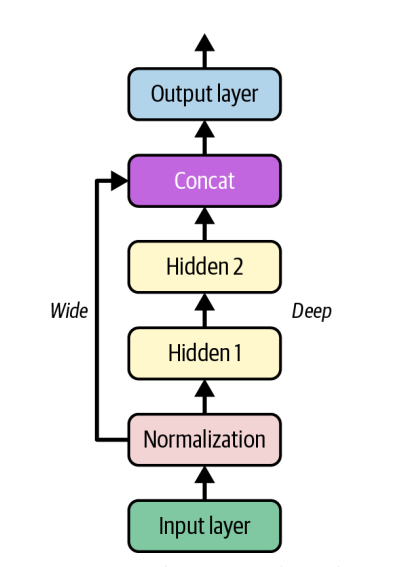

*Image Credits: Hands on Machine Learning by Geron Aurelien. Page No. 425**


**For more details about the dataset visit.**

[California Housing Data](https://github.com/ageron/handson-ml2/blob/master/datasets/housing/README.md)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
housing = fetch_california_housing()
print(housing.keys())
print(f"The dataset contains {housing['data'].shape[0]} rows and {housing['data'].shape[1]} columns")

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
The dataset contains 20640 rows and 8 columns


In [4]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size=0.25, random_state=50)
x_train, x_valid, y_train, y_valid         = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=50)

In [5]:
# to make the code reproducable

tf.random.set_seed(50)

### These lines need some elaboration
To put it in simple words the first five lines create the stack of neural networks with two dense layers with 30 neurons each and a output layer with one neuron. In the next six lines we use these layers as functions to go from input layer to the output. **This is why it is called as functional api.** The last line creates a Keras model object pointing from input to the output.

**Lets go through the code in more detail**

- The first five lines are pretty much self explanotory. It has two dense layers, a normalization layer, a concatination layer and a output layer.
- The next line creates a instance of an input layer specifying the type of data the model would receive including the shape and dtype. Keep in mind that there is no data is being processed yet, we are just telling the model how to connect the layers to make a way from input layer to the ouput layer.
- Next we call the `normalization_layer` as a function and pass the inputt as an argument to it which created `hidden1`
- Similarly `hidden_layer_1` and `hidden_layer_2` are called taking the previously created objects as inputs.
- Till here we have connected all the layers sequentially, next we use the `concat_layer` and connect the `input` to the second hidden layers `output`.
- Next we call `ouptut_layer` by passing it the concated layers.
- The last line as said would create Keras model object.

In [27]:
normalization_layer = keras.layers.Normalization()
hidden_layer_1      = keras.layers.Dense(30, activation='relu')
hidden_layer_2      = keras.layers.Dense(30, activation='relu')
concat_layer        = keras.layers.Concatenate()
output_layer        = keras.layers.Dense(1) 

In [28]:
inputt      = keras.layers.Input(shape=[x_train.shape[1]])
normalized  = normalization_layer(inputt)
hidden1     = hidden_layer_1(normalized)
hidden2     = hidden_layer_2(hidden1)
concat      = concat_layer([normalized, hidden2])
output      = output_layer(concat)

model       = keras.Model(inputs=[inputt], outputs=[output])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 8)                    17        ['input_1[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense_3 (Dense)             (None, 30)                   270       ['normalization_1[0][0]']     
                                                                                                  
 dense_4 (Dense)             (None, 30)                   930       ['dense_3[0][0]']         

You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name.
And also there are ways to get the models weight matrix and bias vector, there is also a `set_weights` method using which, you can set the weights.

In [42]:
# get model list of layers
model.layers

# access layer by its index 
hidden1 = model.layers[2]
print(hidden1.name)

# access layer by its name
model.get_layer('dense_4')

# access model parameters
weights, biases = hidden1.get_weights()
print(weights.shape, biases.shape)

dense_3
(8, 30) (30,)


Now, its time to compile, fit, train and evaluate the model. Remember you should add a preproccesing step by calling the models `adapt()` method?

In [43]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    optimizer=optimizer,
    loss = "mse",
    metrics=["RootMeanSquaredError"]
)

normalization_layer.adapt(x_train)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 5s 8ms/step - loss: 1.3934 - root_mean_squared_error: 1.1804 - val_loss: 0.8667 - val_root_mean_squared_error: 0.9310
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4513 - root_mean_squared_error: 0.6718 - val_loss: 1.8239 - val_root_mean_squared_error: 1.3505
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3942 - root_mean_squared_error: 0.6278 - val_loss: 0.8121 - val_root_mean_squared_error: 0.9011
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3761 - root_mean_squared_error: 0.6133 - val_loss: 1.1333 - val_root_mean_squared_error: 1.0646
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3648 - root_mean_squared_error: 0.6040 - val_loss: 0.8538 - val_root_mean_squared_error: 0.9240
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3542 - root_mean_squared_error: 0.5951 - val_loss: 1.6769 - val_

In [46]:
# now you should check how the model performs on unseen data (test data)

model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4373 - root_mean_squared_error: 0.6613


[0.437320739030838, 0.6613023281097412]

So, in summary, the model takes the input data, normalizes it, passes it through two hidden layers, concatenates the normalized input with the output of the second hidden layer, and then produces a single output value. 

## Actual Complex Model

But wait this architecture quite similar to that of the sequential API except the fact that instead of directly connecting hidden layer to the output we concatenate it with the input. You might be thinking what's special in it. Well, the functional API is much more than that, it provides various other functionalities, one being we can send a subset of features through the wide path and other subset through the deep path. For instance we could send features 0-4 through the wide path and features 3-7 (overlapping) through the deep path.


**This picture shows what I want to convey**

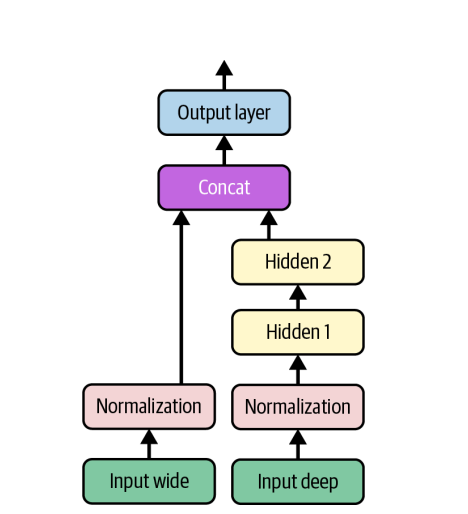

*Image Credits: Hands on Machine Learning by Geron Aurelien. Page No. 427*

In [7]:
input_wide = keras.layers.Input(shape=[5], name="input_wide")
input_deep = keras.layers.Input(shape=[5], name="input_deep")

normalize_layer_wide  = keras.layers.Normalization()
normalize_layer_deep  = keras.layers.Normalization()

normalize_wide        = normalize_layer_wide(input_wide)
normalize_deep        = normalize_layer_deep(input_deep)

hidden_layer_1        = keras.layers.Dense(30, activation='relu')
hidden1               = hidden_layer_1(normalize_deep)
hidden_layer_2        = keras.layers.Dense(30, activation='relu')
hidden2               = hidden_layer_2(hidden1)

concat_layer          = keras.layers.Concatenate()
concat                = concat_layer([normalize_wide, hidden2])

output_layer          = keras.layers.Dense(1)
output                = output_layer(concat)

model                 = keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Point to note here is that we pass `input_wide`, `input_deep` while creating keras model object since we have two inputs here.

Now we can compile and train the model as usual but bare in mind that while calling the models `fit()` method we must pass a pair of matrices `x_train_wide` and `x_train_deep` instead of a single matrice `x_train`, this also applies to `x_valid`, `x_test` and `x_new`.

In [8]:
x_train_wide, x_train_deep   = x_train[:, :5], x_train[:, 3:]
x_valid_wide, x_valid_deep   = x_valid[:, :5], x_valid[:, 3:]
x_test_wide, x_test_deep     = x_test[:, :5], x_test[:, 3:]

# get some instances from x_test to predict the value
x_new_wide, x_new_deep       = x_test_wide[:3], x_test_deep[:3]

In [16]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
        loss="mse",
        optimizer=optimizer,
        metrics=["RootMeanSquaredError"]
    )

# calling adapt method before we train

norm_wide = normalize_layer_wide.adapt(x_train_wide)
norm_deep = normalize_layer_deep.adapt(x_train_deep)

to_be_trained = {"input_wide": x_train_wide, "input_deep": x_train_deep}
history   = model.fit(
                    to_be_trained, y_train,
                    epochs=20,
                    validation_data=((x_valid_wide, x_valid_deep), y_valid)
                )

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.3390 - root_mean_squared_error: 0.5822 - val_loss: 0.3506 - val_root_mean_squared_error: 0.5921
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3364 - root_mean_squared_error: 0.5800 - val_loss: 0.5132 - val_root_mean_squared_error: 0.7164
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3335 - root_mean_squared_error: 0.5775 - val_loss: 0.6959 - val_root_mean_squared_error: 0.8342
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3374 - root_mean_squared_error: 0.5808 - val_loss: 1.3111 - val_root_mean_squared_error: 1.1450
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3443 - root_mean_squared_error: 0.5868 - val_loss: 0.7020 - val_root_mean_squared_error: 0.8379
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3348 - root_mean_squared_error: 0.5786 - val_loss: 0.6520 - val_

### Evaluate and Predict

In [17]:
model.evaluate((x_test_wide, x_test_deep), y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3806 - root_mean_squared_error: 0.6169


[0.38060635328292847, 0.6169330477714539]

In [18]:
model.predict((x_new_wide, x_new_deep))

1/1 [==============================] - 0s 156ms/step


array([[2.0070698],
       [3.0352914],
       [1.7919545]], dtype=float32)

### Adding Two Output Layers

In simple terms, sometimes we need neural networks to give us more than one answer. This can happen because we have different tasks to solve using the same data, like recognizing emotions and glasses in a picture of a face. It's like having different jobs for the same worker. We can also use multiple answers as a way to make the neural network better at its main job, like adding an extra task to help it learn better. So, having many outputs in a neural network is like having a multitasking machine that can do different things at once, and it can even make the main task better by learning more.

Another use case is that it can also be used as a regularization technique. Adding a additional output is simple.

In [10]:
# follow the same code till the main output layer

output_layer = keras.layers.Dense(1, name="main_output")
output = output_layer(concat)

additional_output_layer = keras.layers.Dense(1, name="additional_output")
additional_output = additional_output_layer(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, additional_output])

Since we have two output layers, when compiling we need to pass two loss functions for each output. 

We can also set loss weights to tell the keras that output holds much of importance. And also while training the model we need to provide labels for each label.

In [16]:
loss_funcs = {"main_output": "mse", "additional_output": "mse"}
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss=loss_funcs,
    optimizer=optimizer,
    loss_weights=[0.9, 0.1],
    metrics=["RootMeanSquaredError"]
)

In [17]:
normalize_layer_wide.adapt(x_train_wide)
normalize_layer_deep.adapt(x_train_deep)

history = model.fit(
    (x_train_wide, x_train_deep), (y_train, y_train), 
    epochs=20,
    validation_data=((x_valid_wide, x_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 6s 9ms/step - loss: 2.2480 - main_output_loss: 2.2361 - additional_output_loss: 2.3544 - main_output_root_mean_squared_error: 1.4954 - additional_output_root_mean_squared_error: 1.5344 - val_loss: 1.1445 - val_main_output_loss: 1.0173 - val_additional_output_loss: 2.2886 - val_main_output_root_mean_squared_error: 1.0086 - val_additional_output_root_mean_squared_error: 1.5128
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7758 - main_output_loss: 0.7516 - additional_output_loss: 0.9938 - main_output_root_mean_squared_error: 0.8670 - additional_output_root_mean_squared_error: 0.9969 - val_loss: 0.7227 - val_main_output_loss: 0.6798 - val_additional_output_loss: 1.1087 - val_main_output_root_mean_squared_error: 0.8245 - val_additional_output_root_mean_squared_error: 1.0530
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5675 - main_output_loss: 0.5348 - additional_output_loss: 0.

In [20]:
# keras returns the weighted sum of the losses, as well as all the individual losses and metrics:

evaluation_results = model.evaluate((x_test_wide, x_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = evaluation_results
print(weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse)

162/162 [==============================] - 1s 5ms/step - loss: 0.4057 - main_output_loss: 0.3716 - additional_output_loss: 0.7130 - main_output_root_mean_squared_error: 0.6096 - additional_output_root_mean_squared_error: 0.8444
0.40574148297309875 0.3715992271900177 0.7130240797996521 0.6095893979072571 0.8444075584411621


In [21]:
# similarly the predict() method will return predictions for each output
y_pred_main, y_pred_aux = model.predict((x_new_wide, x_new_deep))
print(y_pred_main, y_pred_aux)

1/1 [==============================] - 0s 368ms/step
[[1.9978421]
 [3.0868874]
 [1.825098 ]] [[1.3086052]
 [3.0459993]
 [1.1076236]]


### Conclusion

You could build most of the diffrent architectures using Functional API